In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
df=pd.read_csv('wine.csv')

In [3]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
features=df.drop('Type',axis=1)
features

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
target=df[['Type']]
target

,Type
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


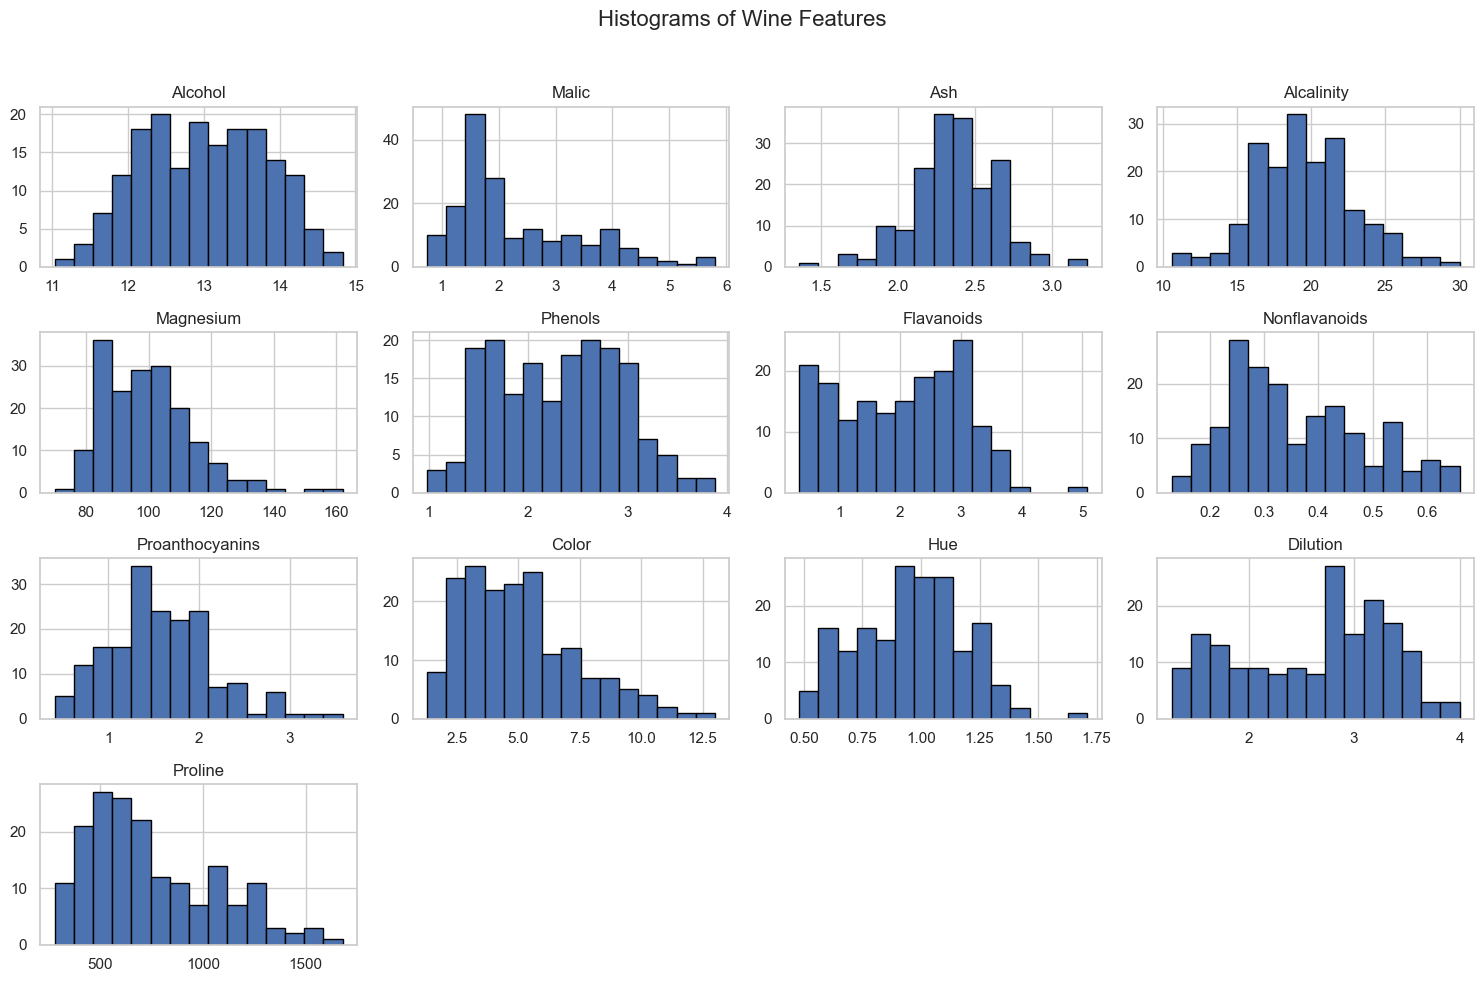

In [10]:
sns.set(style="whitegrid")

# Plotting the histograms for each feature
features.hist(bins=15,figsize=(15,10),layout=(4,4),edgecolor='black')
plt.suptitle('Histograms of Wine Features',fontsize=16)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

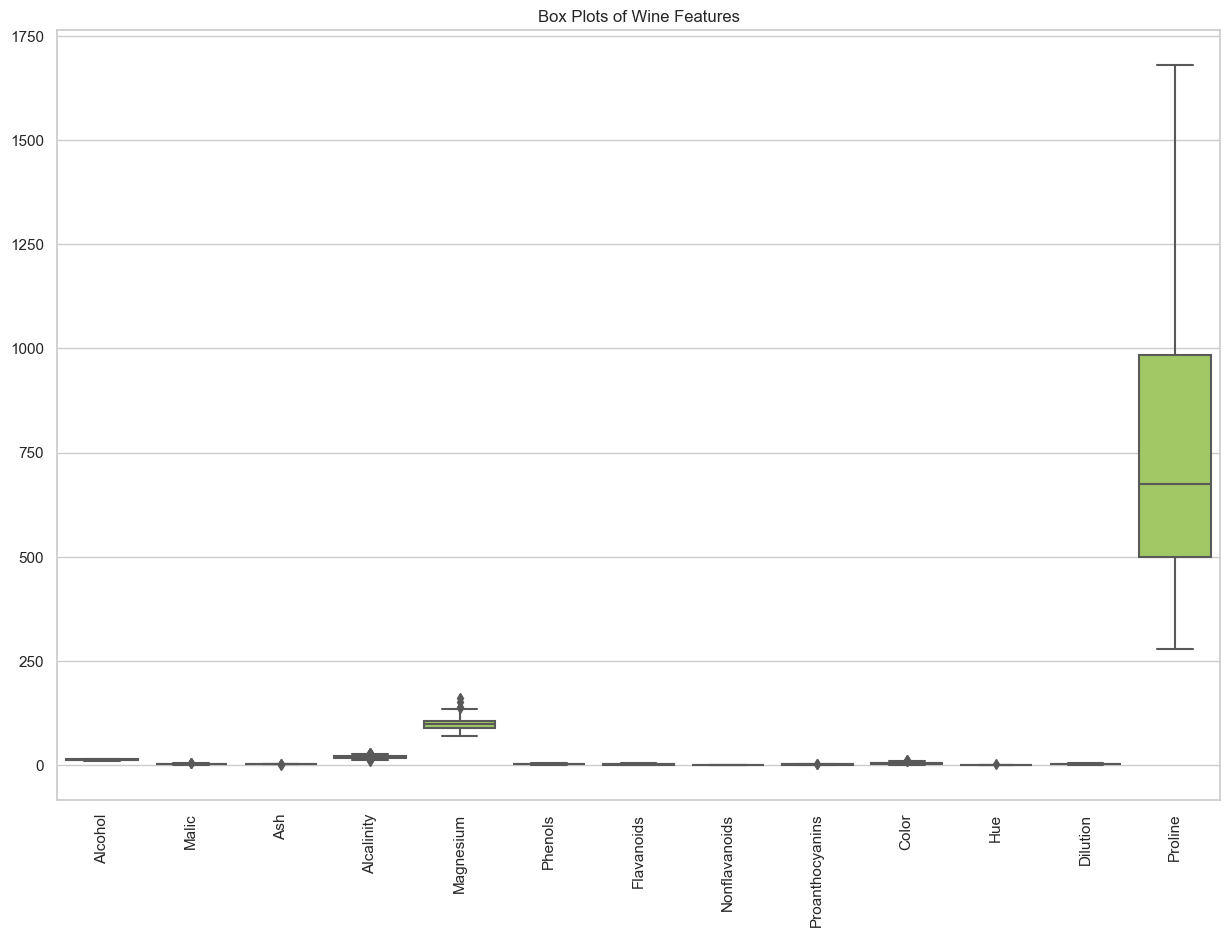

In [11]:
# Plotting the box plots for each feature
plt.figure(figsize=(15,10))
sns.boxplot(data=features,palette="Set2")
plt.xticks(rotation=90)
plt.title('Box Plots of Wine Features')
plt.show()

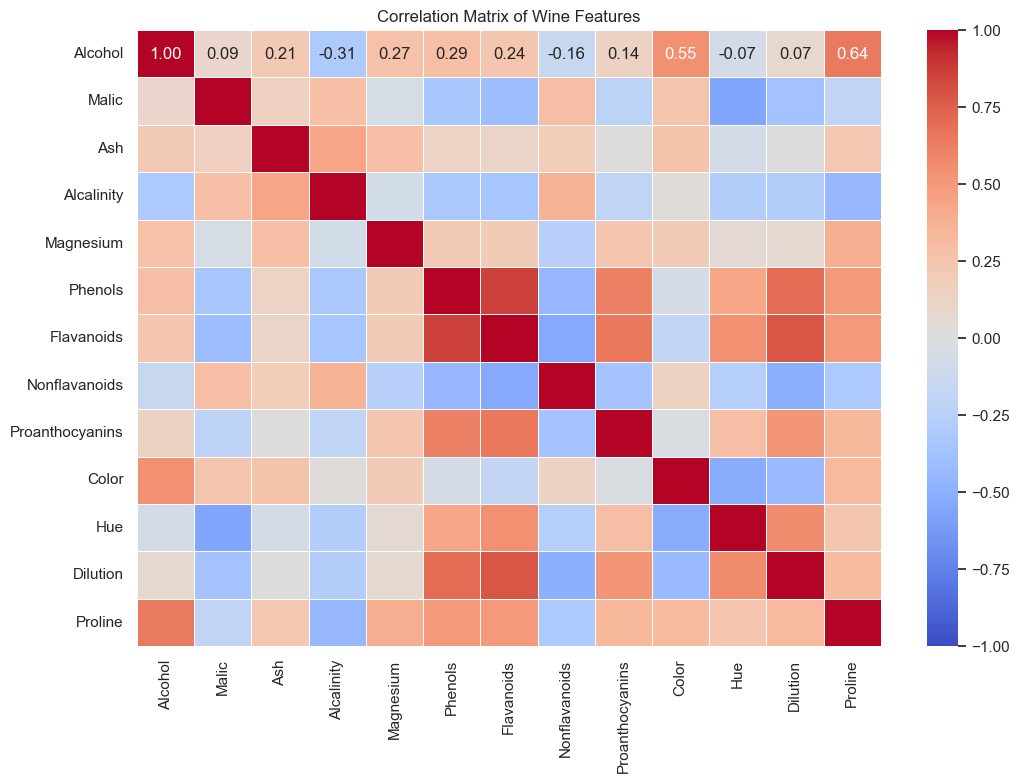

In [12]:
corr_matrix=features.corr()

# Plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',vmin=-1,vmax=1,linewidths=0.5)
plt.title('Correlation Matrix of Wine Features')
plt.show()

In [13]:
# Standardizing the features
std_sca=StandardScaler()
std_sca

StandardScaler()

In [14]:
features_std=std_sca.fit_transform(features)
features_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [15]:
# Apply PCA
pca=PCA()
pca

PCA()

In [16]:
features_pca=pca.fit_transform(features_std)
features_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [17]:
# Calculating the explained variance ratio
explained_variance=pca.explained_variance_ratio_

In [18]:
cumulative_variance=explained_variance.cumsum()

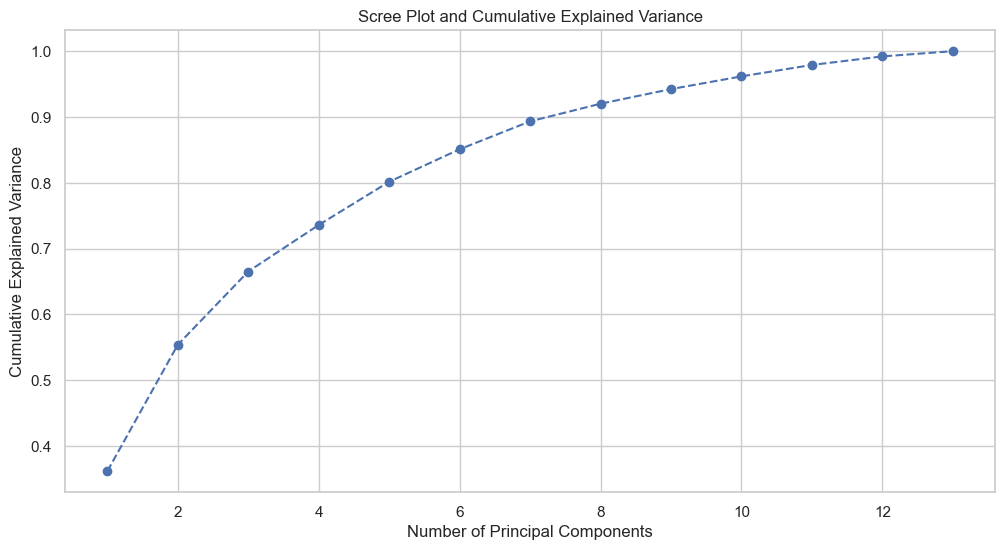

In [19]:
# Plotting the scree plot and cumulative explained variance
plt.figure(figsize=(12,6))
plt.plot(range(1,len(explained_variance)+1),cumulative_variance,marker='o',linestyle='--',color='b')
plt.title('Scree Plot and Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [20]:
# Transform data using the optimal number of components
pca=PCA(n_components=2)
pca

PCA(n_components=2)

In [21]:
features_pca_optimal=pca.fit_transform(features_std)

In [22]:
# Applying K-means clustering to the original standardized data
kmeans=KMeans(n_clusters=3,random_state=100)
kmeans

KMeans(n_clusters=3, random_state=100)

In [23]:
clusters_original=kmeans.fit_predict(features_std)

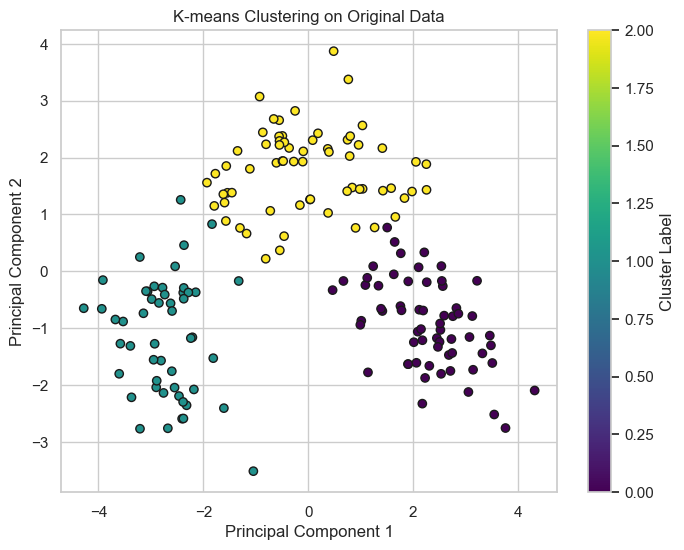

In [24]:
# Visualizing the first two PCA components
plt.figure(figsize=(8,6))
plt.scatter(features_pca[:,0],features_pca[:,1],c=clusters_original,cmap='viridis',edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on Original Data')
plt.colorbar(label='Cluster Label')
plt.show()

In [25]:
# Calculate silhouette score and Davies–Bouldin index
silhouette_avg=silhouette_score(features_std,clusters_original)

In [26]:
davies_bouldin=davies_bouldin_score(features_std,clusters_original)

In [27]:
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies–Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.2848589191898987
Davies–Bouldin Index: 1.389187977718165


In [28]:
# Assuming feature_pca_optimal contains the PCA-transformed data with the optimal number of components
kmeans_pca=KMeans(n_clusters=3,random_state=100)
kmeans_pca

KMeans(n_clusters=3, random_state=100)

In [29]:
clusters_pca=kmeans_pca.fit_predict(features_pca_optimal)

In [30]:
# Evaluating the clustering performance using silhouette score and Davies–Bouldin index
silhouette_avg_pca=silhouette_score(features_pca_optimal,clusters_pca)

In [31]:
davies_bouldin_pca=davies_bouldin_score(features_pca_optimal,clusters_pca)

In [32]:
print(f'Silhouette Score (PCA Data): {silhouette_avg_pca}')
print(f'Davies–Bouldin Index (PCA Data): {davies_bouldin_pca}')

Silhouette Score (PCA Data): 0.5610505693103248
Davies–Bouldin Index (PCA Data): 0.5972661544221362


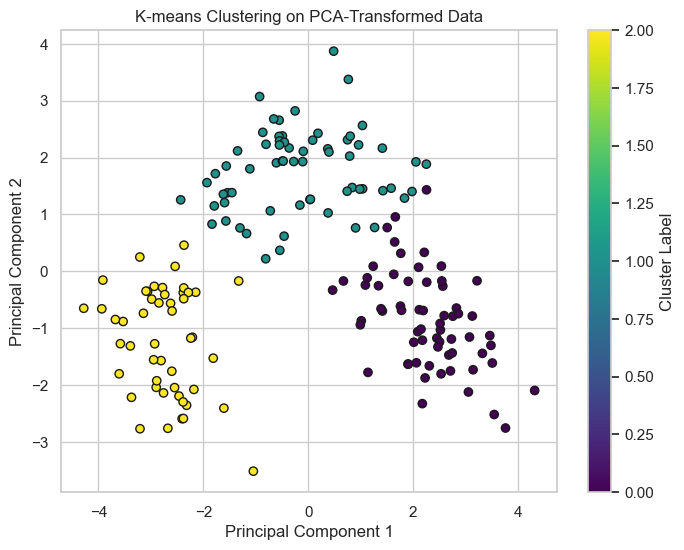

In [33]:
# Visualizing the clustering results obtained from PCA-transformed data
plt.figure(figsize=(8,6))
plt.scatter(features_pca_optimal[:,0],features_pca_optimal[:,1],c=clusters_pca,cmap='viridis',edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA-Transformed Data')
plt.colorbar(label='Cluster Label')
plt.show()

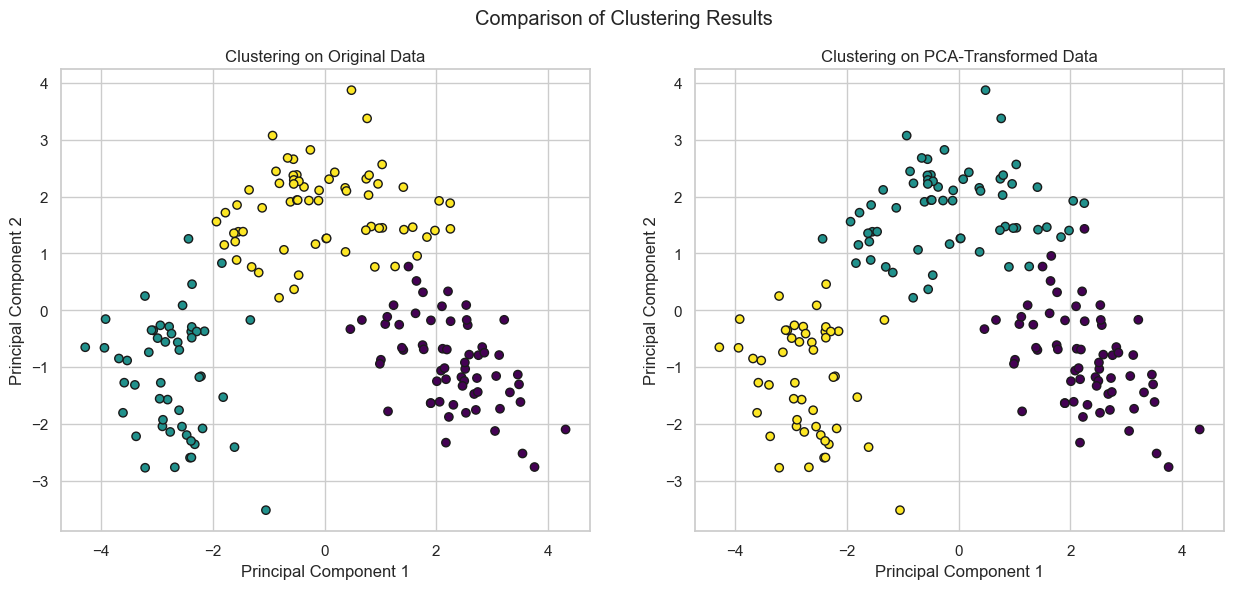

In [34]:
# Comparing the clustering results from PCA-transformed data with the original dataset
fig,axes=plt.subplots(1,2,figsize=(15,6))

# Original data clustering
axes[0].scatter(features_pca[:,0],features_pca[:,1],c=clusters_original,cmap='viridis',edgecolor='k')
axes[0].set_title('Clustering on Original Data')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# PCA-transformed data clustering
axes[1].scatter(features_pca_optimal[:,0], features_pca_optimal[:,1],c=clusters_pca,cmap='viridis',edgecolor='k')
axes[1].set_title('Clustering on PCA-Transformed Data')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

plt.suptitle('Comparison of Clustering Results')
plt.show()

#### Hierarchical Clustering on the Original Data

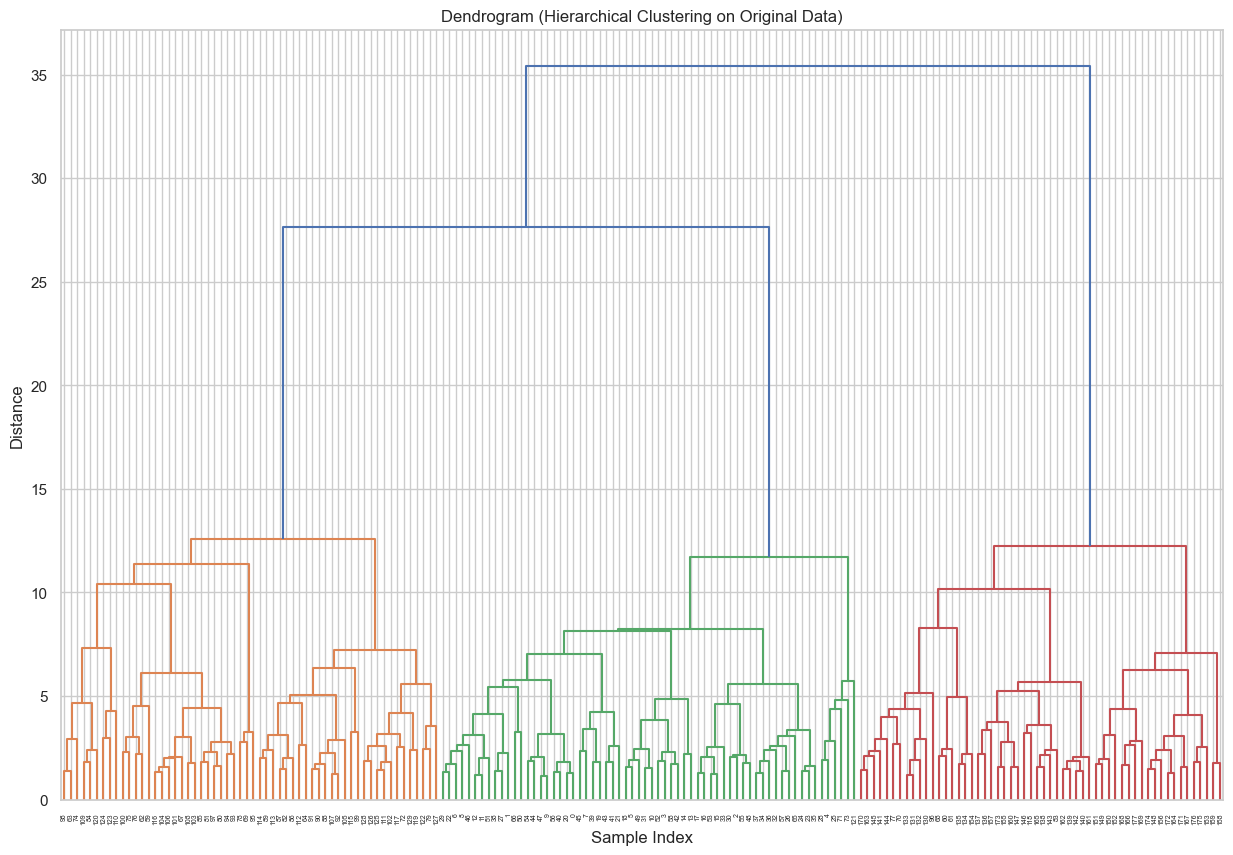

In [35]:
linked=linkage(features_pca,method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15,10))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title('Dendrogram (Hierarchical Clustering on Original Data)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

#### Hierarchical Clustering on PCA-Transformed Data

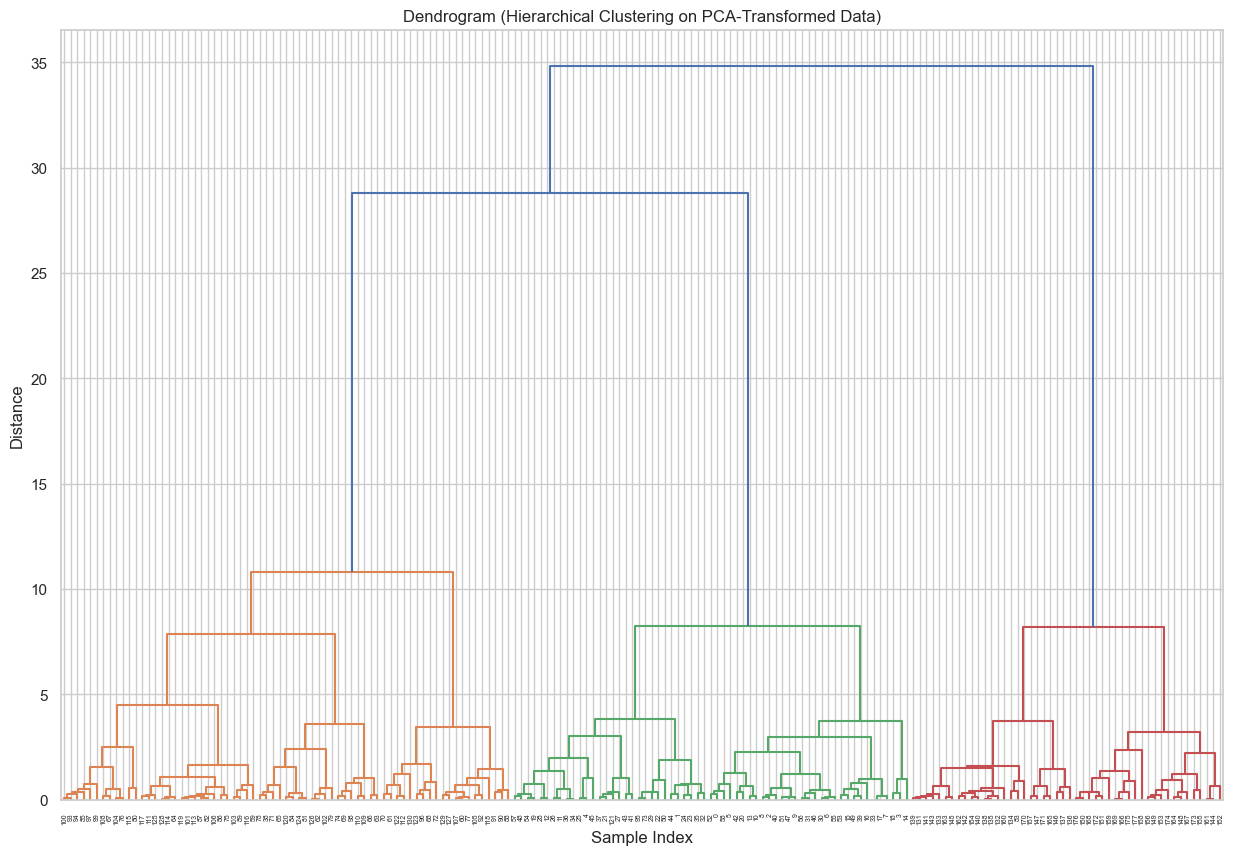

In [36]:
linked_pca=linkage(features_pca_optimal,method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15,10))
dendrogram(linked_pca,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title('Dendrogram (Hierarchical Clustering on PCA-Transformed Data)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [37]:
# Forming clusters for original data
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hc

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [38]:
y_hc=hc.fit_predict(features_pca)

In [39]:
# Forming clusters for PCA-transformed data
hc_pca=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hc_pca

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [40]:
y_hc_pca=hc_pca.fit_predict(features_pca_optimal)

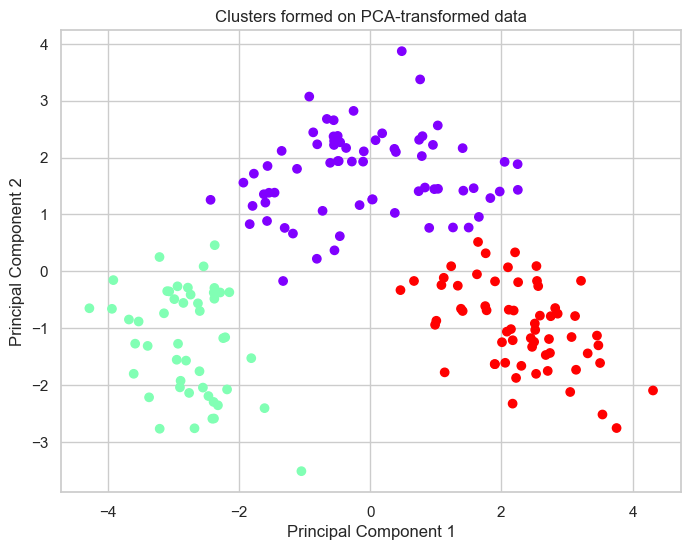

In [41]:
# Comparing clusters
plt.figure(figsize=(8,6))
plt.scatter(features_pca_optimal[:,0],features_pca_optimal[:,1],c=y_hc_pca,cmap='rainbow')
plt.title('Clusters formed on PCA-transformed data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Similarities and Differences in Clustering Results

Cluster Shapes and Distribution:

Original Dataset: Since the original data have high dimensions and varied feature correlations, clusters have irregular shapes or spread across multiple dimensions.
    
PCA-Transformed Dataset: PCA reduced the dataset to a lower-dimensional space, typically capturing the most significant variance. The clusters here appear more compact or well-separated due to the elimination of noise or redundant information.


Cluster Quality:

Silhouette Score & Davies–Bouldin Index: These metrics indicated that PCA has improved the quality of clustering. A highered silhouette score and lowered Davies–Bouldin index in the PCA-transformed dataset suggests that the clusters are better defined or more compact.


Interpretability:

Clustering in the original space offer direct interpretability regarding the original features. In contrast, clustering in the PCA space reflects combinations of features (principal components), which is less intuitive but often more robust.

High Similarity: The clusters are similar across both datasets, PCA likely captured the significant structure of the data without losing important details. The clustering results are consistent, indicating that dimensionality reduction did not compromise the clustering outcome.

Differences in Clustering: Differences indicates that some variance in the original data, which PCA removed as noise or redundancy, was actually contributing to the clusters. This lead to different clustering outcomes in the original and PCA-transformed data.

#### Impact of Dimensionality Reduction on Clustering Performance

Noise Reduction: PCA focuses on the directions with the most variance, which often correspond to the most informative features. By removing noise and irrelevant features, PCA can lead to clearer, more defined clusters. This typically results in higher silhouette scores and lower Davies–Bouldin indices, indicating better clustering performance.

Compactness: In high-dimensional spaces, data points can become sparse, making it harder for clustering algorithms like K-means to form meaningful clusters. PCA reduces the dimensionality, making clusters more compact and easier to separate.

#### Trade-offs Between Using PCA and Clustering Directly on the Original Dataset

Clustering on Original Data:

Pros: Clustering directly on the original data allows for straightforward interpretation of the clusters. Each cluster can be explained in terms of the original features, which is beneficial in domains where understanding the influence of each feature is important.

Cons: High-dimensional data often contain noise and redundant information, which can obscure meaningful clusters and lead to less effective clustering.

Clustering on PCA-Transformed Data:

Pros: PCA transforms the data into a new feature space where each principal component captures the most significant variance. This can lead to more meaningful clusters by filtering out noise and reducing redundancy.

Cons: The principal components are linear combinations of the original features, making them less intuitive to interpret. It can be challenging to explain the clusters in terms of the original features, especially when the domain knowledge is important.

#### Key Findings and Insights

The assignment demonstrated that PCA is a powerful tool for improving clustering outcomes, especially when dealing with high-dimensional data. However, the choice between using PCA and clustering on the original data involves trade-offs between cluster quality, computational efficiency, and interpretability. The decision should be guided by the specific needs of the analysis, whether it prioritizes understanding the original features or achieving the best possible clustering performance.

#### Practical Implications of Using PCA and Clustering in Data Analysis

Enhanced Data Interpretation and Visualization:

PCA: By reducing the dataset to just a few principal components, PCA allows for easier visualization of the data in 2D or 3D space. This is especially valuable in exploratory data analysis (EDA), where understanding the relationships between variables is crucial.

Clustering: Clustering helps to identify natural groupings within data, which can reveal underlying patterns and structure. When combined with PCA, clusters can be visualized more clearly, aiding in the interpretation of complex datasets.

Improved Model Performance:

Dimensionality Reduction: By applying PCA, reduced the number of dimensions, which can lead to better performance of machine learning algorithms, including clustering, classification, and regression models. PCA helps to focus on the most informative aspects of the data, reducing noise and overfitting.

Clustering: Effective clustering can be used for segmenting data, improving the performance of models by applying different algorithms or parameters to different segments.

#### Recommendations for When to Use PCA and Clustering Based on Analysis

When to Use PCA (Principal Component Analysis):

High-Dimensional Data: We can use PCA when the dataset has many features, especially if some features are highly correlated or redundant. PCA helps reduce dimensionality, focusing on the most important variance and making the data more manageable for analysis.

Noise Reduction: If the dataset contains noisy features that do not contribute much to the variance, applying PCA can filter out this noise, leading to cleaner and more meaningful results in subsequent analyses.

Visualization Needs: When we need to visualize high-dimensional data, PCA can project the data into 2D or 3D space, making it easier to understand patterns and relationships among the data points.

Preprocessing for Machine Learning: Before applying machine learning algorithms, especially those sensitive to the curse of dimensionality (ex:K-means, SVM), we can use PCA to reduce dimensions and improve algorithm performance.

Improving Computational Efficiency: In cases where computational resources are limited, and the dataset is large, we can use PCA to reduce the number of features, which can lead to faster processing and more efficient analysis.

When to Use Clustering:

Identifying Natural Groupings: We can use clustering when we need to discover natural groupings or patterns within the data. This is particularly useful in customer segmentation, market research, anomaly detection, and other exploratory tasks.

Data Segmentation: Clustering is ideal for segmenting data into distinct groups for targeted analysis, such as separating different types of customers or products based on shared characteristics.

Enhancing Predictive Models: Clustering can be used as a preprocessing step to enhance predictive models by creating new features that capture cluster membership or to design different models for different clusters.

Anomaly Detection: In cases where identifying outliers is crucial, clustering can help detect anomalies by isolating data points that do not fit well into any cluster.

When to Combine PCA and Clustering:

High-Dimensional Clustering: When dealing with high-dimensional data,we can apply PCA first to reduce dimensionality, then perform clustering on the PCA-transformed data. This approach can lead to more distinct and well-defined clusters.

Improving Clustering Quality: We can use PCA as a preprocessing step if initial clustering results on the original data are poor due to noise or irrelevant features. PCA can improve the quality of the clusters by focusing on the most informative aspects of the data.

Visualization of Clusters: After performing clustering on high-dimensional data, we can use PCA to reduce dimensions and visualize the clusters in 2D or 3D space, making it easier to communicate the results.